In [1]:
import pandas as pd
import numpy as np

In [2]:
#Setting working directory
%cd /Users/yanbeicheng/Desktop/
whiskey=pd.read_csv("scotch_review.csv")

/Users/yanbeicheng/Desktop


**Text Mining**

Sentiment analysis through "vader" lexicon

In [3]:
#importing wordnet corresponding to positive tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [4]:
#importing necessary NLP library
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')

import nltk
nltk.download('averaged_perceptron_tagger')

import nltk
nltk.download('wordnet')

import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yanbeicheng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/yanbeicheng/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yanbeicheng/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yanbeicheng/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
#Cleaning description
def clean_desc(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    extra_stopwords_list=['whiskey','bottle','whisky','wine']
    stop.extend(extra_stopwords_list)
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

In [6]:
#text data after cleaning
whiskey["description_clean"] = whiskey["description"].apply(lambda x: clean_desc(x))

In [7]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#add in neutrality, pos, negative, compounded score based on description_clean
sid = SentimentIntensityAnalyzer()
whiskey["sentiments"] = whiskey["description_clean"].apply(lambda x: sid.polarity_scores(x))
whiskey = pd.concat([whiskey.drop(['sentiments'], axis=1), whiskey['sentiments'].apply(pd.Series)], axis=1)

In [10]:
whiskey.head()

,Unnamed: 0,name,category,review.point,price,currency,description,description_clean,neg,neu,pos,compound
0,1,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225,$,"Magnificently powerful and intense. Caramels, ...",magnificently powerful intense caramel dry pea...,0.000,0.679,0.321,0.9674
1,2,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,97,4500.00,$,What impresses me most is how this whisky evol...,impress evolve incredibly complex nose palate ...,0.000,0.852,0.148,0.7783
2,3,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500.00,$,There have been some legendary Bowmores from t...,legendary bowmores every bit equal share remar...,0.079,0.752,0.169,0.7003
3,4,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,96,325,$,With a name inspired by a 1926 Buster Keaton m...,name inspire buster keaton movie bottle produc...,0.110,0.676,0.214,0.6914
4,5,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,96,160,$,"Captivating, enticing, and wonderfully charmin...",captivate entice wonderfully charm first blend...,0.000,0.741,0.259,0.9552


**Visualization of Sentiment Analysis - negative, neutral, positive, compound**

Text(0.5, 1.0, 'Visualization of Compound')

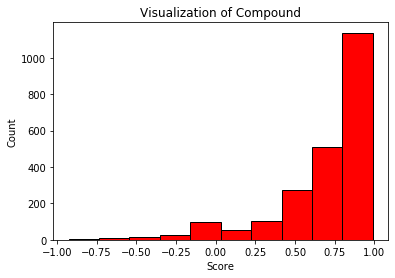

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
#create a histogram of compounded score
whiskey['compound'].hist(bins=10,ec='black',grid=False,color="red")

plt.ylabel("Count")
plt.xlabel('Score')
plt.title("Visualization of Compound")

Text(0.5, 1.0, 'Visualization of Neg')

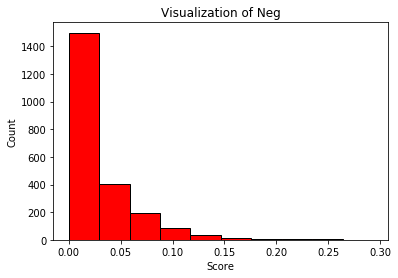

In [11]:
#create a histogram of negative score
whiskey['neg'].hist(bins=10,ec='black',grid=False,color="red")

plt.ylabel("Count")
plt.xlabel('Score')
plt.title("Visualization of Neg")

Text(0.5, 1.0, 'Visualization of Pos')

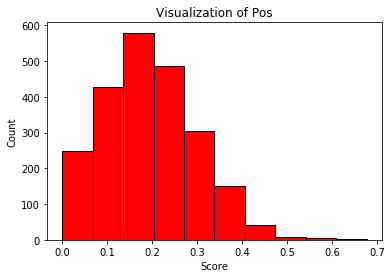

In [12]:
#create a histogram of positive score
whiskey['pos'].hist(bins=10,ec='black',grid=False,color="red")

plt.ylabel("Count")
plt.xlabel('Score')
plt.title("Visualization of Pos")

In [ ]:
#create a histogram of neutral score
whiskey['neu'].hist(bins=10,ec='black',grid=False,color="red")

plt.ylabel("Count")
plt.xlabel('Score')
plt.title("Visualization of Neutrality")

In [13]:
# add number of characters column
whiskey["nb_chars"] = whiskey["description"].apply(lambda x: len(x))

# add number of words column
whiskey["nb_words"] = whiskey["description"].apply(lambda x: len(x.split(" ")))

**Reviewing number of characters & words in description**

In [14]:
print("Average number of characters for description:", whiskey["nb_chars"].mean())
print("Average number of words for description:", whiskey["nb_words"].mean())

Average number of characters for description: 439.3324432576769
Average number of words for description: 71.85135736537606


**Reviewing positive & negative descriptions against sentiment scores & review point**

In [15]:
#Viewing review points above or equal to 80 (chosen as less than avg review point) against sentiment scores
whiskey[whiskey["review.point"] >= 80].sort_values("review.point", ascending = False)[["description", "pos", "neg", "compound", "review.point"]].head(10)

,description,pos,neg,compound,review.point
0,"Magnificently powerful and intense. Caramels, ...",0.321,0.000,0.9674,97
2,There have been some legendary Bowmores from t...,0.169,0.079,0.7003,97
1,What impresses me most is how this whisky evol...,0.148,0.000,0.7783,97
8,The Dalmore is one of a handful of whiskies th...,0.096,0.000,0.8020,96
11,Classic sherry cask-aged Macallan. Antique amb...,0.000,0.000,0.0000,96
10,It’s great that Glenlivet releases whiskies un...,0.206,0.052,0.8583,96
9,A rich amber color and elegantly oxidized note...,0.432,0.031,0.9790,96
12,A remarkable beauty from the Angus town of Mon...,0.398,0.000,0.9788,96
7,"Definitely showing its age, but not in a bad w...",0.171,0.061,0.6486,96
6,Deep gold color. Surprisingly lively on the no...,0.216,0.000,0.9596,96


In [16]:
#Viewing review points lower than 80 (chosen as less than avg review point) against sentiment scores
whiskey[whiskey["review.point"] < 80].sort_values("review.point", ascending = True)[["description", "pos", "neg", "compound", "review.point"]].head(10)

,description,pos,neg,compound,review.point
2246,"Fiery peat kiln smoke, tar, and ripe barley on...",0.142,0.288,-0.7650,63
2245,"The sherry is very dominant and cloying, which...",0.187,0.216,-0.0276,70
2244,"Earthy, fleshy notes with brooding grape notes...",0.331,0.000,0.8555,70
2243,"Aged in a sherry cask, which adds sweet notes ...",0.083,0.000,0.4588,71
2242,"Its best attributes are vanilla, toasted cocon...",0.206,0.119,0.6705,72
2241,"Youthful, and somewhat brooding for a Tomintou...",0.314,0.031,0.8692,72
2240,"Quite pale in color. Very youthful and naked, ...",0.192,0.000,0.7650,72
2239,Origins is Benromach’s new program to highligh...,0.236,0.057,0.9287,72
2238,Port Ellen is going to just keep getting rarer...,0.163,0.000,0.8126,73
2237,This Lowland distillery only operated from 195...,0.133,0.032,0.5423,73


**World Cloud**

In [17]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


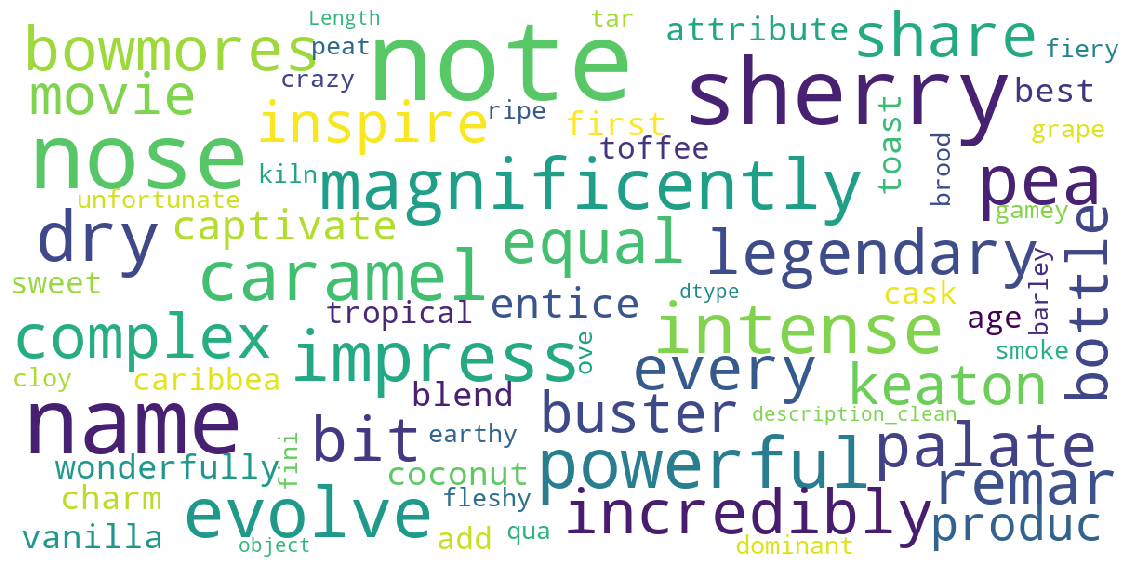

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(whiskey["description_clean"])

**Sentiment Analysis through Polarity**

In [19]:
#Exclamation mark counter:
def count_exclamation_mark(string_text):
    count = 0
    for char in string_text:
        if char == '!':
            count += 1
    return count

In [20]:
whiskey['count_exc']=whiskey['description'].apply(count_exclamation_mark)
whiskey.head()

,Unnamed: 0,name,category,review.point,price,currency,description,description_clean,neg,neu,pos,compound,nb_chars,nb_words,count_exc
0,1,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225,$,"Magnificently powerful and intense. Caramels, ...",magnificently powerful intense caramel dry pea...,0.000,0.679,0.321,0.9674,456,66,0
1,2,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,97,4500.00,$,What impresses me most is how this whisky evol...,impress evolve incredibly complex nose palate ...,0.000,0.852,0.148,0.7783,495,82,1
2,3,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500.00,$,There have been some legendary Bowmores from t...,legendary bowmores every bit equal share remar...,0.079,0.752,0.169,0.7003,503,84,0
3,4,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,96,325,$,With a name inspired by a 1926 Buster Keaton m...,name inspire buster keaton movie bottle produc...,0.110,0.676,0.214,0.6914,440,77,0
4,5,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,96,160,$,"Captivating, enticing, and wonderfully charmin...",captivate entice wonderfully charm first blend...,0.000,0.741,0.259,0.9552,528,71,0


In [21]:
whiskey['count_exc'].describe(np.arange(0.2, 1.0, 0.2))

count    2247.000000
mean        0.066756
std         0.260134
min         0.000000
20%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
80%         0.000000
max         2.000000
Name: count_exc, dtype: float64

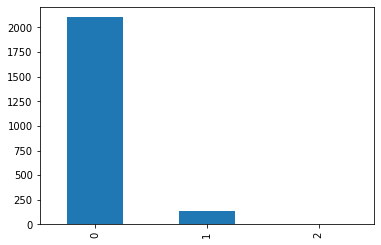

In [22]:
#visualization of exclamation counts
whiskey['count_exc'].value_counts().sort_index().plot(kind='bar')

In [24]:
pip install -U git+https://github.com/sloria/TextBlob.git

  Cloning https://github.com/sloria/TextBlob.git to /private/var/folders/83/1cxkwd1n0qv6q_q1rwdw36_c0000gn/T/pip-req-build-962pp_0r
  Running command git clone -q https://github.com/sloria/TextBlob.git /private/var/folders/83/1cxkwd1n0qv6q_q1rwdw36_c0000gn/T/pip-req-build-962pp_0r
  Created wheel for textblob: filename=textblob-0.15.3-py2.py3-none-any.whl size=636510 sha256=b812e8995cc8f427f9edf7b61a7befd9d0bd3231df1cc8b8df45bfb248680040
  Stored in directory: /private/var/folders/83/1cxkwd1n0qv6q_q1rwdw36_c0000gn/T/pip-ephem-wheel-cache-vf9zcens/wheels/ce/52/41/280606fd2896ec6e5bfde4aed433d517f8467bce34a45c73b5
Successfully built textblob
  Attempting uninstall: textblob
    Found existing installation: textblob 0.15.3
    Uninstalling textblob-0.15.3:
      Successfully uninstalled textblob-0.15.3
Note: you may need to restart the kernel to use updated packages.


In [25]:
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger

In [26]:
# review polarity analysis (polarity score is a float within [-1,1])
whiskey['Polarity'] = whiskey['description'].
apply(lambda x: TextBlob(x).sentiment.polarity)
whiskey.head()

,Unnamed: 0,name,category,review.point,price,currency,description,description_clean,neg,neu,pos,compound,nb_chars,nb_words,count_exc,Polarity
0,1,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225,$,"Magnificently powerful and intense. Caramels, ...",magnificently powerful intense caramel dry pea...,0.000,0.679,0.321,0.9674,456,66,0,0.195671
1,2,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,97,4500.00,$,What impresses me most is how this whisky evol...,impress evolve incredibly complex nose palate ...,0.000,0.852,0.148,0.7783,495,82,1,-0.062037
2,3,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500.00,$,There have been some legendary Bowmores from t...,legendary bowmores every bit equal share remar...,0.079,0.752,0.169,0.7003,503,84,0,0.337917
3,4,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,96,325,$,With a name inspired by a 1926 Buster Keaton m...,name inspire buster keaton movie bottle produc...,0.110,0.676,0.214,0.6914,440,77,0,0.239583
4,5,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,96,160,$,"Captivating, enticing, and wonderfully charmin...",captivate entice wonderfully charm first blend...,0.000,0.741,0.259,0.9552,528,71,0,0.263542


Text(0.5, 1.0, 'Visualization of Polarity')

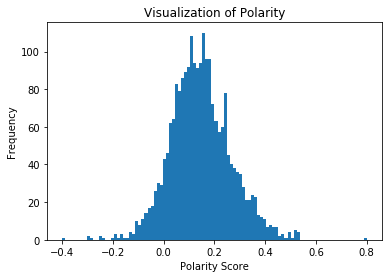

In [27]:
#Visualization of polarity
whiskey['Polarity'].plot(kind='hist', bins=100)

plt.xlabel('Polarity Score')
plt.title("Visualization of Polarity")

Word Cloud

In [28]:
#categorize reviews into two categories 
pos_df = whiskey[whiskey['review.point'] >= 80]
neg_df = whiskey[whiskey['review.point'] < 80]
pos_df.head()

,Unnamed: 0,name,category,review.point,price,currency,description,description_clean,neg,neu,pos,compound,nb_chars,nb_words,count_exc,Polarity
0,1,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225,$,"Magnificently powerful and intense. Caramels, ...",magnificently powerful intense caramel dry pea...,0.000,0.679,0.321,0.9674,456,66,0,0.195671
1,2,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,97,4500.00,$,What impresses me most is how this whisky evol...,impress evolve incredibly complex nose palate ...,0.000,0.852,0.148,0.7783,495,82,1,-0.062037
2,3,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500.00,$,There have been some legendary Bowmores from t...,legendary bowmores every bit equal share remar...,0.079,0.752,0.169,0.7003,503,84,0,0.337917
3,4,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,96,325,$,With a name inspired by a 1926 Buster Keaton m...,name inspire buster keaton movie bottle produc...,0.110,0.676,0.214,0.6914,440,77,0,0.239583
4,5,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,96,160,$,"Captivating, enticing, and wonderfully charmin...",captivate entice wonderfully charm first blend...,0.000,0.741,0.259,0.9552,528,71,0,0.263542


In [29]:
pos_words =[]
neg_words = []

for descr in pos_df.description:
    pos_words.append(descr) 
pos_words = ' '.join(pos_words)
pos_words[:40]

for descr in neg_df.description:
    neg_words.append(descr)
neg_words = ' '.join(neg_words)
neg_words[:400]


'Shy is the word. Pale in color, again suggestive of little cask interaction. There’s a little hint of white currant and light cereal, delicate and fragile — more fragile than the Balmenach — with a little touch of white chocolate. As it opens, out comes violet. The mouth is tense, as if everything is still baled up, even after all this time. Very light acidity gives a certain freshness that water '

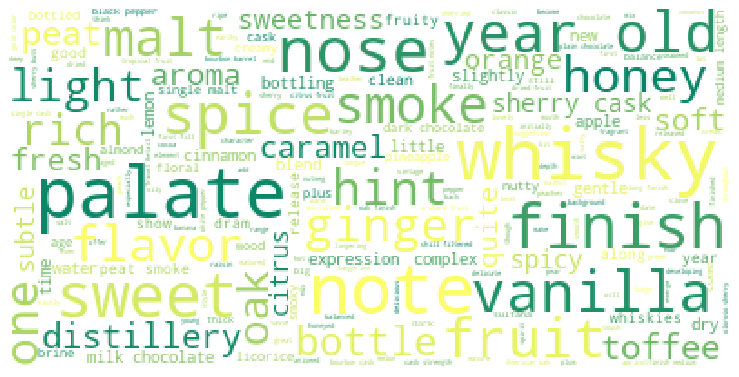

In [102]:
#Word cloud: most frequent words in description (where review point >= 80)
wordcloud = WordCloud().generate(pos_words)

wordcloud = WordCloud(background_color="white",max_words=len(pos_words),\
                      max_font_size=40, relative_scaling=.5, colormap='summer').
                                                            generate(pos_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

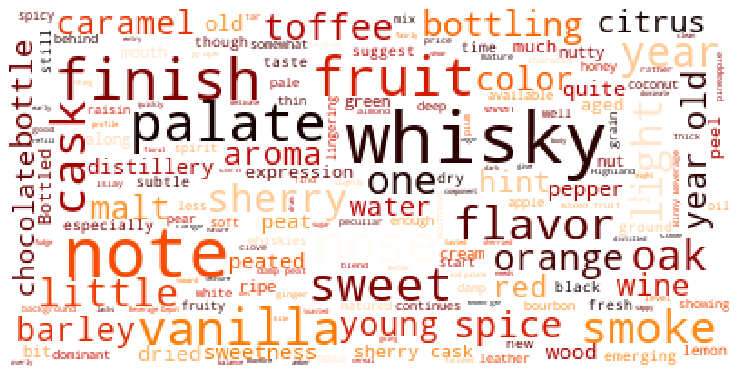

In [30]:
#Word cloud: most frequent words in description (where review point < 80)
wordcloud = WordCloud().generate(neg_words)

wordcloud = WordCloud(background_color="white",max_words=len(neg_words),\
                      max_font_size=40, relative_scaling=.5, colormap='gist_heat').
                                                                generate(neg_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()